In [1]:
import sys
import string
import itertools
from collections import Counter, defaultdict
import re

from pathlib import Path
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import networkx as nx

In [3]:
%load_ext line_profiler

In [4]:
data = Path('../data/day_09.txt').read_text()

In [5]:
inps = [[int(k) for k in line] for line in data.splitlines()]

In [6]:
def part_a():
    rows = len(inps)
    cols = len(inps[0])
    count = 0
    for i, row in enumerate(inps):
        for j, val in enumerate(row):
            if i != 0 and inps[i-1][j] <= val:
                continue
            if j != 0 and inps[i][j-1] <= val:
                continue
            if i != rows - 1 and inps[i+1][j] <= val:
                continue
            if j != cols - 1 and inps[i][j+1] <= val:
                continue
            count += (val + 1)
    return count

print(part_a())
%timeit part_a()

491
1.43 ms ± 5.46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
def part_b():
    g = nx.Graph()
    rows = len(inps)
    cols = len(inps[0])
    count = 0
    for i, row in enumerate(inps):
        for j, val in enumerate(row):
            if val == 9:
                continue
            if i != rows - 1 and inps[i+1][j] != 9:
                g.add_edge((i,j), (i+1,j))
            if j != cols - 1 and inps[i][j+1] != 9:
                g.add_edge((i,j), (i,j+1))
    comps = sorted(nx.connected_components(g), key=len)
    comps = comps[-3:]
    return len(comps[0]) * len(comps[1]) * len(comps[2])

print(part_b())
%timeit part_b()

1075536
21 ms ± 245 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


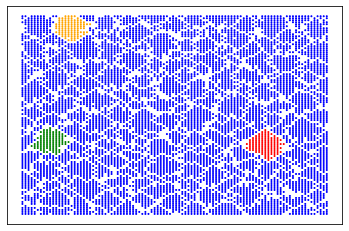

In [8]:
g = nx.Graph()
rows = len(inps)
cols = len(inps[0])
count = 0
for i, row in enumerate(inps):
    for j, val in enumerate(row):
        if val == 9:
            continue
        if i != rows - 1 and inps[i+1][j] != 9:
            g.add_edge((i,j), (i+1,j))
        if j != cols - 1 and inps[i][j+1] != 9:
            g.add_edge((i,j), (i,j+1))

pos = {k: np.array(k[::-1]) for k in g.nodes}
three_largest = sorted(nx.connected_components(g), key=len)[-3:]
node_colors = ['red' if node in three_largest[-1] else 'orange' if node in three_largest[-2] else 'green' 
               if node in three_largest[-3] else 'blue' for node in g.nodes]
nx.draw_networkx_nodes(g, pos, node_size=1, node_color=node_colors)
plt.show()

In [9]:
## part 2 alternate

In [10]:
import scipy.ndimage

In [11]:
%%timeit

arr = np.array(inps)
arr = arr + 1
arr[arr == 10] =0 
labelled, ncomp = scipy.ndimage.label(arr)
labels, counts = np.unique(labelled.reshape(-1), return_counts=True)
labels = labels[1:]
counts = counts[1:]

top_three = sorted(zip(labels, counts), key=lambda x: -x[1])[:3]
np.prod([k[1] for k in top_three])

991 µs ± 40.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
